In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Import cleaned dataset
train = pd.read_csv('./datasets/train_final.csv')

In [56]:
# Import cleaned testset and save IDs separately
test_ids = pd.read_csv('./datasets/test.csv')['Id']
test = pd.read_csv('./datasets/test_final.csv')

### Model Preparation

### Train Test Split & Scaling

In order to make all algorithms work properly with our data, we need to scale the features in our dataset.

In [57]:
features = [col for col in train._get_numeric_data().columns if col !='saleprice']
features
X = train[features]
y = train['saleprice']

In [58]:
# We specified the size of the test set to be 30% of the whole dataset. This leaves 70% for the training dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [59]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Instantiate Models

In [60]:
lr = LinearRegression()

In [61]:
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))

In [62]:
lasso = LassoCV(n_alphas=100)

In [63]:
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

### Model Evaluation

#### Cross Validation

In [64]:
# Testing our linear regression model on unseen data
lr_cv_scores = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print('R2:', lr_cv_scores.mean())
lr_cv_mse_scores = -cross_val_score(lr,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error')
print('RSME:', np.sqrt(lr_cv_mse_scores.mean()))

R2: 0.9135677054312812
RSME: 22468.299504979386


In [65]:
# Testing our ridge regression model on unseen data
ridge_cv_scores = cross_val_score(ridge,X_train_scaled,y_train,cv=5)
print('R2:', ridge_cv_scores.mean())
ridge_cv_mse_scores = -cross_val_score(ridge,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error')
print('RSME:', np.sqrt(ridge_cv_mse_scores.mean()))

R2: 0.911338501257689
RSME: 22776.101754189756


In [66]:
# Testing our lasso regression model on unseen data
lasso_cv_scores = cross_val_score(lasso,X_train_scaled,y_train,cv=5)
print('R2:', lasso_cv_scores.mean())
lasso_cv_mse_scores = -cross_val_score(lasso,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error')
print('RSME:', np.sqrt(lasso_cv_mse_scores.mean()))

R2: 0.9158259485781907
RSME: 22217.041860034748


In [67]:
# Testing our elasticnet regression model on unseen data
enet_cv_scores = cross_val_score(enet,X_train_scaled,y_train,cv=5)
print('R2:', enet_cv_scores.mean())
enet_cv_mse_scores = -cross_val_score(enet,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error')
print('RSME:', np.sqrt(enet_cv_mse_scores.mean()))

R2: 0.9124115978327044
RSME: 22659.939853576787


The  Lasso model is performing the best so far, with an R2 of 0.9158 and RMSE of 22217.

#### Standard Linear Regression

In [68]:
lr.fit(X_train_scaled,y_train)

print("Training R2(LR): " + str(lr.score(X_train_scaled,y_train)))
print("Testing R2(LR): " + str(lr.score(X_test_scaled,y_test)))
print("Estimate of Testing R2(LR): " + str(lr_cv_scores.mean()))

Training R2(LR): 0.9376148806202699
Testing R2(LR): 0.9277116752670245
Estimate of Testing R2(LR): 0.9135677054312812


In [69]:
print("Training RMSE(LR): " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR): " + str(np.sqrt(mean_squared_error(y_test,lr.predict(X_test_scaled)))))
print("Estimate of Testing RMSE(LR): " + str(np.sqrt(lr_cv_mse_scores.mean())))

Training RMSE(LR): 19270.224622842798
Testing RMSE(LR): 22586.507567769593
Estimate of Testing RMSE(LR): 22468.299504979386


The model is a bit of overfitting  as our accuracy has decreased between our training and validation data

#### Ridge Regression

In [70]:
ridge.fit(X_train_scaled,y_train);

In [71]:
# Optimal ridge alpha
best_ridge_alpha = ridge.alpha_
best_ridge_alpha

9.04040404040404

In [72]:
# Create new ridge model with optimal alpha and fit to training data
ridge = Ridge(alpha=best_ridge_alpha)
ridge.fit(X_train_scaled,y_train);

In [73]:
print("Training R2(ridge) " + str(ridge.score(X_train_scaled,y_train)))
print("Testing R2(ridge) " + str(ridge.score(X_test_scaled,y_test)))
print("Estimate of Testing R2(ridge) " + str(ridge_cv_scores.mean()))

Training R2(ridge) 0.9362719099442314
Testing R2(ridge) 0.9275464147142588
Estimate of Testing R2(ridge) 0.911338501257689


In [74]:
print("Training MSE(Ridge) ", np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled))))
print("Testing MSE(Ridge) ", np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_scaled))))
print("Estimate of Testing RMSE (Ridge) " + str(np.sqrt(ridge_cv_mse_scores.mean())))

Training MSE(Ridge)  19476.536234247797
Testing MSE(Ridge)  22612.310682160387
Estimate of Testing RMSE (Ridge) 22776.101754189756


The model is still overfitting slightly, but ridge regression seems to return better results than the standard linear regression model.

#### Lasso Regression

In [75]:
# Fit LassoCV model to data
lasso.fit(X_train_scaled,y_train)

LassoCV()

In [76]:
# Generate best alpha
best_lasso_alpha = lasso.alpha_
best_lasso_alpha

165.9468233037469

In [77]:
# Create new lasso model with optimal alpha and fit to training data
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=165.9468233037469)

In [78]:
print("Training R2(Lasso) ", lasso.score(X_train_scaled,y_train))
print("Testing R2(Lasso):", lasso.score(X_test_scaled,y_test))
print("Estimate of Testing R2(Lasso):", lasso_cv_scores.mean())

Training R2(Lasso)  0.9341407516942363
Testing R2(Lasso): 0.9289580351611095
Estimate of Testing R2(Lasso): 0.9158259485781907


In [79]:
print("Training RMSE(Lasso):", np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print("Testing RMSE(Lasso):", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
print("Estimate of Testing RMSE(Lasso):", np.sqrt(lasso_cv_mse_scores.mean()))

Training RMSE(Lasso): 19799.519761185147
Testing RMSE(Lasso): 22390.948216877674
Estimate of Testing RMSE(Lasso): 22217.041860034748


The model is still overfitting slightly, but the result from lasso regression seems  better than the standard linear regression model and ridge regression.

#### ElasticNet Regression

In [80]:
enet_alphas = np.arange(0.01, 1.0, 0.005)
enet_ratio = 0.5
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5, max_iter=5_000)
enet = enet.fit(X_train_scaled, y_train)

In [81]:
# Optimal Enet Alpha
enet_optimal_alpha = enet.alpha_
enet_optimal_alpha

0.03

In [82]:
# Create new enet model with optimal alpha and fit to training data
enet = ElasticNet(alpha=enet_optimal_alpha)
enet.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.03)

In [83]:
enet_cv_scores = cross_val_score(enet,X_train_scaled,y_train,cv=5)
enet_cv_scores.mean()

0.9133771979279077

In [84]:
enet_cv_mse_scores = -cross_val_score(enet,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error')
np.sqrt(enet_cv_mse_scores.mean())

22509.024517792568

In [85]:
print('Training R2(ElasticNet):', enet.score(X_train_scaled,y_train))
print('Testing R2(ElasticNet):', enet.score(X_test_scaled,y_test))
print('Estimate of Testing R2(ElasticNet): ', enet_cv_scores.mean())

Training R2(ElasticNet): 0.9351486346124137
Testing R2(ElasticNet): 0.9270457865811667
Estimate of Testing R2(ElasticNet):  0.9133771979279077


In [86]:
print('Training MSE(ElasticNet):', np.sqrt(mean_squared_error(y_train, enet.predict(X_train_scaled))))
print('Testing MSE(ElasticNet):', np.sqrt(mean_squared_error(y_test, enet.predict(X_test_scaled))))
print('Estimate of Testing RMSE(ElasticNet):', np.sqrt(enet_cv_mse_scores.mean()))

Training MSE(ElasticNet): 19647.43378852994
Testing MSE(ElasticNet): 22690.297652760717
Estimate of Testing RMSE(ElasticNet): 22509.024517792568


The result from Elasticnet regression seems worst than Lasso regression and liner regression but better than ridge regression.

### Conclusion & Recommendations

Lasso model was the most successful in predicting housing sale prices. On the dataset comprising of 30% of the test data, the model achieved an RMSE of 22390. On the dataset comprising of the other 70% of the test data, the model performed within expectations, returning an RMSE of 22217. It also has a high R2 on our training data, where it can explain up to 93.4% of the variance in sale price.

Text(0.5, 1.0, 'Lasso Predictions of Sale Price vs Actual Sale Price')

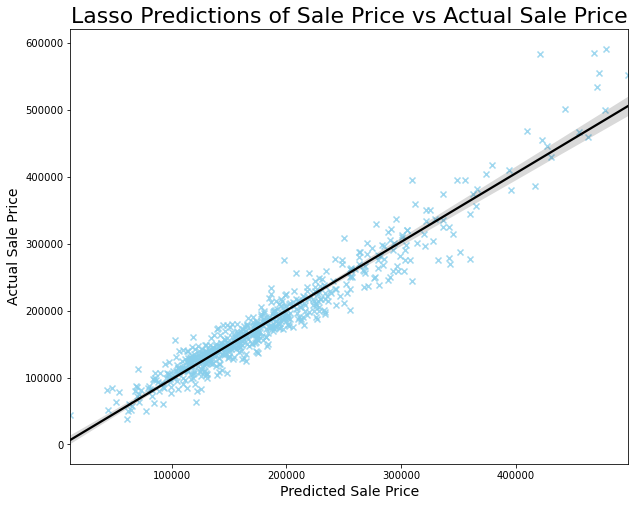

In [87]:
# Create scatterplot to show predicted values versus actual values
lasso_preds = lasso.predict(X_test_scaled)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=lasso_preds, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Lasso Predictions of Sale Price vs Actual Sale Price', fontsize=22)

Text(0.5, 1.0, 'Residuals')

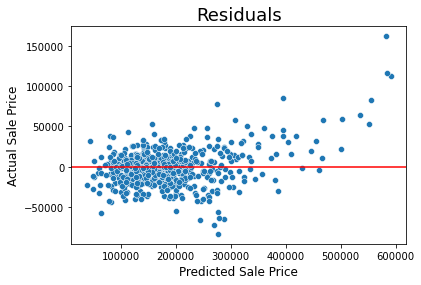

In [88]:
ax = sns.scatterplot(data=housing, x=y_test, y=y_test-lasso_preds)
ax.axhline(y=0, c='red')
plt.xlabel('Predicted Sale Price', fontsize=12)
plt.ylabel('Actual Sale Price', fontsize=12)
plt.title('Residuals', fontsize=18)

The residuals also mostly equally distributed, which supports the multiple linear regression assumption of homoscedasticity, where the variance of error terms must be similar across the values of the independent variables.

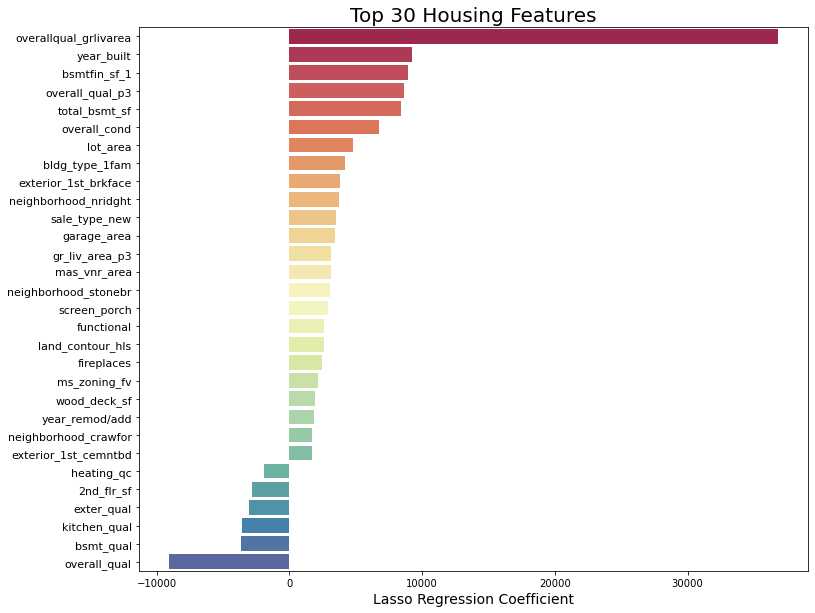

In [89]:
# Create dataframe of features, coefficients and absolute coefficients
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lasso.coef_)
lasso_df['Coef'] = lasso.coef_
lasso_df['Feature'] = features

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(30)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 30 Housing Features', fontsize=20);

In [90]:
# Displaying top 20 coefficients - Top 15 positive coefficients and bottom 5 negative coefficients
display(data.head(15), data.tail(5))

,Feature,Coef
0,overallqual_grlivarea,36793.058730
1,year_built,9247.814209
2,bsmtfin_sf_1,8905.302250
3,overall_qual_p3,8591.980881
4,total_bsmt_sf,8378.391589
5,overall_cond,6763.500692
6,lot_area,4806.648256
7,bldg_type_1fam,4183.485949
8,exterior_1st_brkface,3779.324042
9,neighborhood_nridght,3708.456923


,Feature,Coef
25,2nd_flr_sf,-2786.823899
26,exter_qual,-3058.532594
27,kitchen_qual,-3548.941602
28,bsmt_qual,-3616.759639
29,overall_qual,-9064.824562


### Recommendations
Based on our model, the homeowner :
- Improve on Overall Condition, Overall Quality, 1st Floor Area  and Ground Living Area, since these are continuous variables.
- Expand Basement Finished Area only if the house is situated on flat land (Land Contour)
- Expand Masonry Veneer Area only if the house is situated on flat land (Land Contour)
- If the house is in neighborhood D, reduce the areas of Basement Finished, Total Basement and Masonry Veneer
- Minimise the Basement areas
- Sell the house while it is still young

For homebuyers:

- Buy houses with good Overall Condition, Overall Quality, and large 1st Floor Area  and Ground Living Area
- If the house is situated on flat land, buy houses with small or no Basement Finished Area and Masonry Veneer Area, so that you can increase these aspects later on
- If the house is in neighborhood D, avoid those with Basement Finished, Total Basement and Masonry Veneer Areas
- Buy houses with small or no Basement areas
- Buy houses which are young, since prices deteriorate with age


#### Model Limiations
#### Tradeoffs between interpretability and accuracy
Our model is unlikely to be generalizable to other cities. Here, we used all 5000+ factors to determine house prices because we did not have enough domain knowledge to perform manual feature selection.  In reality, two populations may not share the same "taste" for desirable features in a house. This is true across time and space. As our dataset is dated more than a decade ago and demographics shift, what Ames citizens used to find desirable then may not be so now. Similarly what Ames citizens find desirable in a house, Colo citizens may not agree. Colo is another city in Story County, Iowa, just like Ames.

To make the model more generalizable, we could cut down on the number of variables and use only general features found and assessed within most houses in the world, such as distance to a transport system. This would of course come at an expense of the predictive power of the model.

#### Other enhancements we could make to our model include:
Testing other predictive models such as random forest, support vector machines, since we are limited to only linear regression here
Obtaining more housing data, preferably recent, to update the model and expose it to more variations
Obtaining more general features of the house such as crime rate, ethnicity, distance to amenities or facilities



### Submission

In [91]:
# Refit model on entire training dataset
X_scaled = ss.fit_transform(X)
lasso = LassoCV()
lasso.fit(X_scaled, y)
lasso.score(X_scaled,y)

0.9356634409312854

In [92]:
# Remaining features after zeroing by lasso regression
print('Total Features before Lasso regression:', len(features))
print('Features Zeroed by Lasso regression:', len(lasso.coef_[lasso.coef_ == 0]))
print('Features Remaining after Lasso regression:', len(features) - len(lasso.coef_[lasso.coef_ == 0]))

Total Features before Lasso regression: 162
Features Zeroed by Lasso regression: 41
Features Remaining after Lasso regression: 121


In [93]:
final_test_scaled = ss.transform(test)

In [94]:
final_predictions = lasso.predict(final_test_scaled)

In [95]:
test['SalePrice'] = final_predictions

In [96]:
test['Id'] = test_ids

In [97]:
# Create csv for submission
submission = test[['Id','SalePrice']]
submission.to_csv('./datasets/kaggle_submission.csv', index=False)

#View submission
submission.head()

,Id,SalePrice
0,2658,156787.071584
1,2718,168201.044505
2,2414,200167.105536
3,1989,110613.279488
4,625,171713.980103


### Appendix

Text(0.5, 1.05, 'Regularization versus Standard Linear Regression')

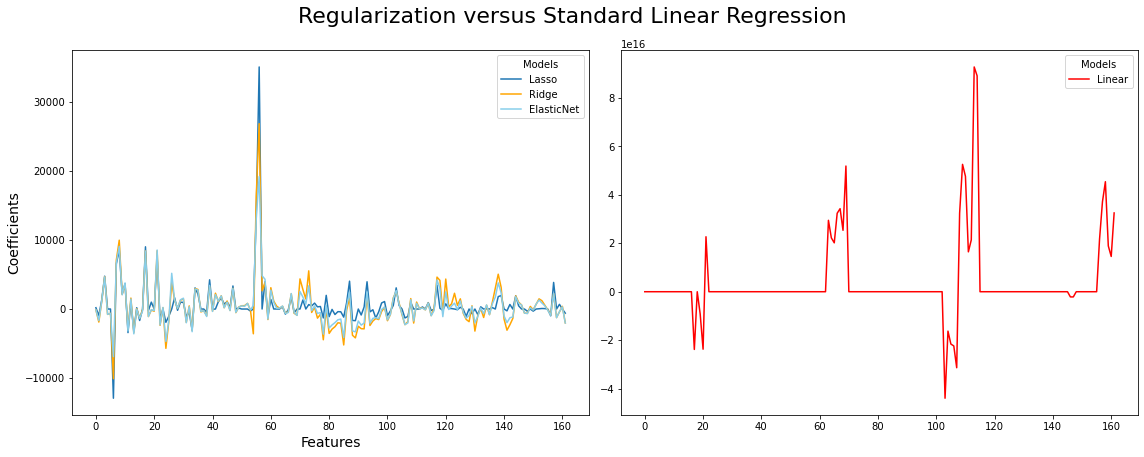

In [98]:
# For reference
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax = ax.ravel()
g = sns.lineplot(data=lasso.coef_, ax=ax[0])
sns.lineplot(data=ridge.coef_, ax=ax[0], color='orange')
sns.lineplot(data=enet.coef_, ax=ax[0],color='skyblue')
g.set_xlabel('Features', fontsize=14)
g.set_ylabel('Coefficients', fontsize=14)
g.legend(title='Models', loc='upper right', labels=['Lasso', 'Ridge', 'ElasticNet'])

g2 = sns.lineplot(data=lr.coef_, ax=ax[1], color='red')
g2.legend(title='Models', loc='upper right', labels=['Linear'])

plt.tight_layout()
plt.suptitle('Regularization versus Standard Linear Regression', fontsize=22, y=1.05)

<AxesSubplot:>

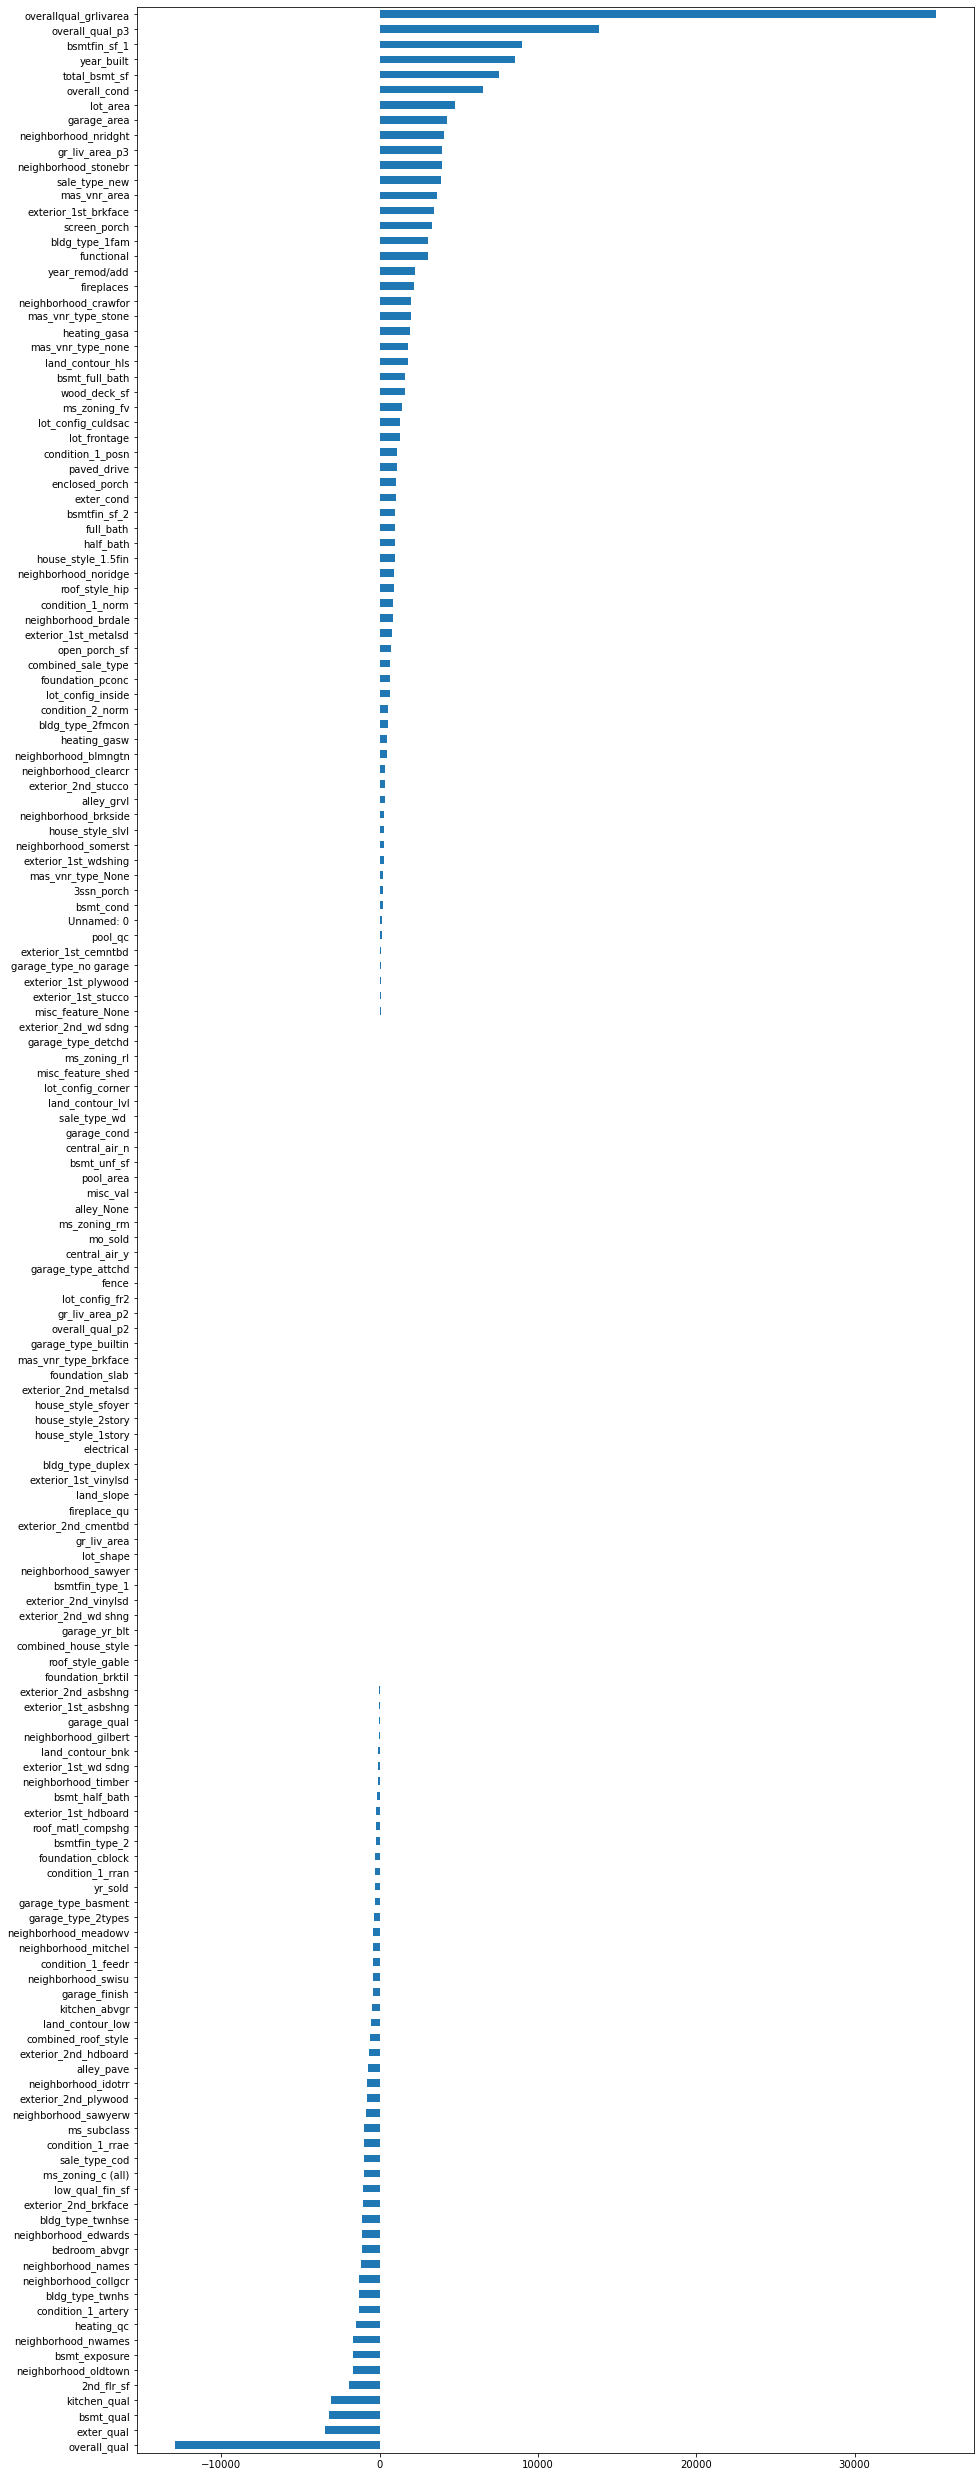

In [99]:
# Full plot of all features and lasso coefficients
pd.Series(lasso.coef_, index=features).sort_values().plot.barh(figsize=(15,45))